<a href="https://colab.research.google.com/github/BOOSAMADHANMOHANREDDY/UPGRAD/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project1-Supermart Grocery Sales - Retail Analytics of sales pridictions**

In [2]:
### import libraries for data analysis purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
### Upload supermart Grosary sales csv
data = pd.read_excel('/content/supermart_grocery_sales.xlsx')

In [18]:
print(data.head())

  Order ID Customer Name           Category   Sub Category         City  \
0   OD3324       Jackson             Bakery  Breads & Buns        Salem   
1    OD740       Haseena             Bakery          Cakes    Nagercoil   
2    OD741         Vinne          Beverages  Health Drinks       Trichy   
3    OD742         Sudha             Snacks     Chocolates   Dharmapuri   
4   OD3873         Verma  Eggs, Meat & Fish           Fish  Tirunelveli   

  Order Date   Region  Sales  Discount  Profit       State  
0 2015-01-03  Central    864      0.26  380.16  Tamil Nadu  
1 2015-01-04  Central   2033      0.15  325.28  Tamil Nadu  
2 2015-01-04  Central    698      0.32  223.36  Tamil Nadu  
3 2015-01-04  Central    759      0.27  174.57  Tamil Nadu  
4 2015-01-05     East    878      0.35  149.26  Tamil Nadu  


In [20]:
print(data.describe())

                          Order Date        Sales     Discount       Profit
count                           9994  9994.000000  9994.000000  9994.000000
mean   2017-04-30 05:17:08.056834048  1496.596158     0.226817   374.937082
min              2015-01-03 00:00:00   500.000000     0.100000    25.250000
25%              2016-05-23 00:00:00  1000.000000     0.160000   180.022500
50%              2017-06-26 00:00:00  1498.000000     0.230000   320.780000
75%              2018-05-14 00:00:00  1994.750000     0.290000   525.627500
max              2018-12-30 00:00:00  2500.000000     0.350000  1120.950000
std                              NaN   577.559036     0.074636   239.932881


In [22]:
print(data.dtypes)

Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
dtype: object


In [23]:
### Data cleaning
# Check for missing values
print(data.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [25]:
# Drop any rows with missing values
print(data.dropna(inplace=True))

None


In [27]:
# Check for duplicates
print(data.drop_duplicates(inplace=True))

None


In [28]:
### Label Encoding for Categorical Variables
le = LabelEncoder()

In [32]:
## Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])


In [33]:
# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [39]:
# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])

In [38]:
# Display the first few rows after encoding
print(data.head())


  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0   OD3324       Jackson         0             2    16 2015-01-03       0   
1    OD740       Haseena         0             3    10 2015-01-04       0   
2    OD741         Vinne         1            13    20 2015-01-04       0   
3    OD742         Sudha         6             5     4 2015-01-04       0   
4   OD3873         Verma         2            10    19 2015-01-05       1   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0    864      0.26  380.16      0          3            1        2015  
1   2033      0.15  325.28      0          4            1        2015  
2    698      0.32  223.36      0          4            1        2015  
3    759      0.27  174.57      0          4            1        2015  
4    878      0.35  149.26      0          5            1        2015  


In [40]:
### Aplly the Exploratory Data Analysis (EDA)  to data

<ipython-input-41-61cbde9d0716>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


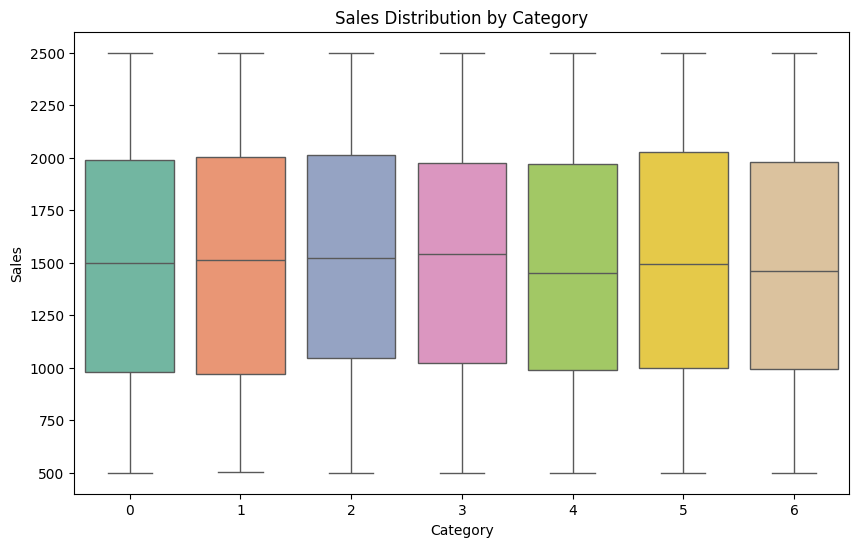

In [41]:
##Distribution of Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

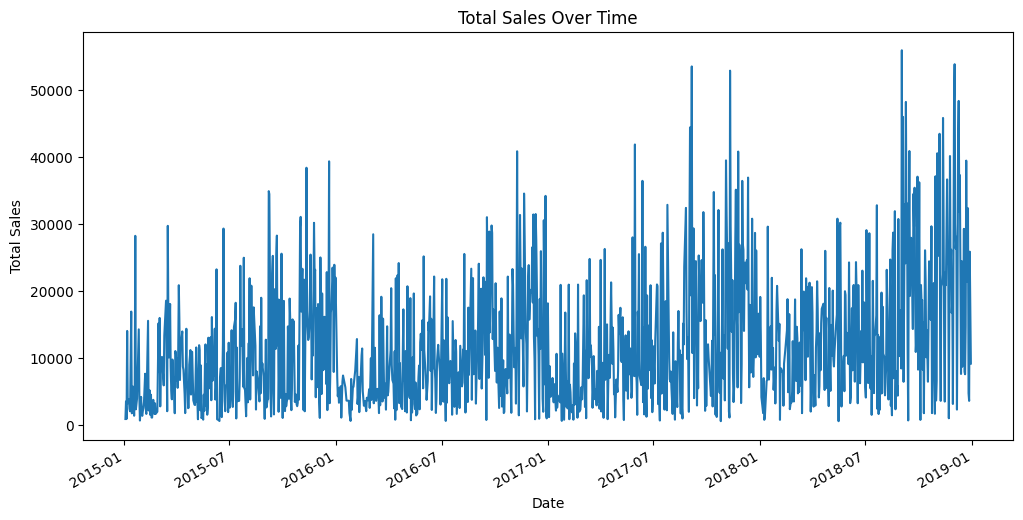

In [42]:
###Sales Trends Over Time
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [46]:
## Correlation Heatmap
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   int64         
 3   Sub Category   9994 non-null   int64         
 4   City           9994 non-null   int64         
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   int64         
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   int64         
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int32         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(6), object(2)
memory u

In [53]:
data1 = data.drop(columns=['Order ID','Customer Name','Order Date','Region','State'])
print(data1)

      Category  Sub Category  City  Sales  Discount  Profit  Order Day  \
0            0             2    16    864      0.26  380.16          3   
1            0             3    10   2033      0.15  325.28          4   
2            1            13    20    698      0.32  223.36          4   
3            6             5     4    759      0.27  174.57          4   
4            2            10    19    878      0.35  149.26          5   
...        ...           ...   ...    ...       ...     ...        ...   
9989         6             6    12   1854      0.20  685.98         30   
9990         6             5    18   1167      0.28  455.13         30   
9991         1            21    15   1690      0.19  135.20         30   
9992         3            18    13    548      0.25  164.40         30   
9993         5             8     0    997      0.20  438.68         30   

      Order Month  Order Year  
0               1        2015  
1               1        2015  
2              

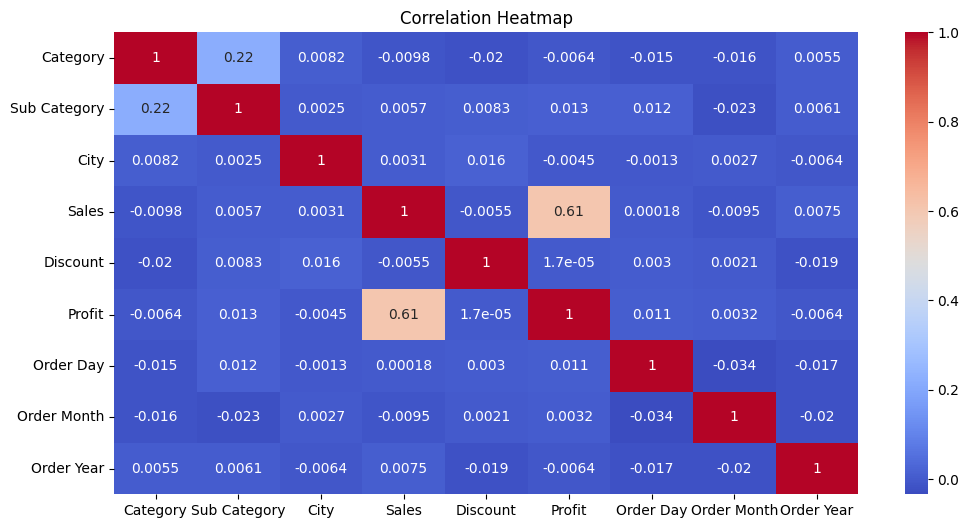

In [54]:
plt.figure(figsize=(12, 6))
corr_matrix = data1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [57]:
##Barchat data ananysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   int64         
 3   Sub Category   9994 non-null   int64         
 4   City           9994 non-null   int64         
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   int64         
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   int64         
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int32         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(6), object(2)
memory u

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   int64         
 3   Sub Category   9994 non-null   int64         
 4   City           9994 non-null   int64         
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   int64         
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   int64         
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int32         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(6), object(2)
memory u

In [76]:
# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales'])
target = data['Sales']

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [78]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
print(X_train,X_test)

[[ 0.98137143  1.63512356  1.38038431 ... -1.42561889 -2.06734764
   0.24392657]
 [ 0.48365102  1.18607118 -1.3566902  ... -0.8555111  -0.54821707
  -0.64657248]
 [ 1.47909184  0.7370188  -0.34829433 ... -0.96953266  0.97091349
   1.13442563]
 ...
 [ 0.98137143  0.43765055 -1.64480331 ...  1.53894163  0.05943515
   0.24392657]
 [-0.51178981 -0.31077008 -0.63640744 ... -0.8555111   0.05943515
  -1.53707154]
 [-1.00951022  0.28796642  0.66010154 ... -0.05736019 -1.1558693
   1.13442563]] [[-0.51178981 -1.05919072  1.66849741 ... -0.05736019  0.36326127
  -0.64657248]
 [-1.50723063 -1.35855897  1.23632775 ... -1.42561889  0.97091349
  -1.53707154]
 [-1.00951022  1.48543944 -1.21263365 ... -0.17138175 -1.1558693
   0.24392657]
 ...
 [-0.01406939  1.03638706 -0.06018122 ...  1.0828554   0.97091349
  -1.53707154]
 [-0.51178981 -1.05919072 -1.3566902  ... -1.53964045 -1.45969541
   1.13442563]
 [ 0.48365102 -0.01140183  1.23632775 ... -0.51344642  1.2747396
  -0.64657248]]


In [81]:
###Train a Linear Regression Model
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [82]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 204152.7816279126
R-squared: 0.35268862844046933


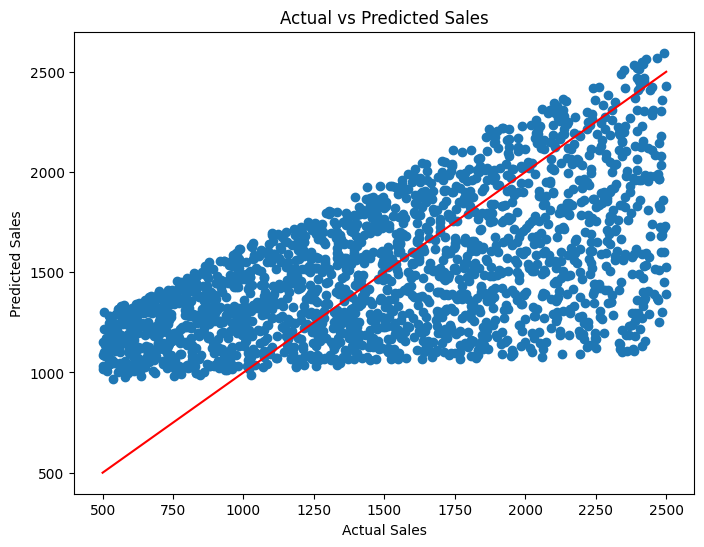

In [83]:
###Visualize the Results
###Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

Conclustion:
1.The linear regression model provided a reasonable prediction for sales based on the features selected.
2.The model’s R-squared value indicates a good fit, explaining a significant portion of the variance in sales.
3.Further refinement of the model could involve trying different machine learning algorithms, such as decision trees or ensemble methods.


In [88]:
# applying groupby() function to
# group the data on Category.
df=data.groupby("Category")
df.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
Category,,,,,,,,,,,,,
0,OD3324,Jackson,2,16,2015-01-03,0,864,0.26,380.16,0,3,1,2015
1,OD741,Vinne,13,20,2015-01-04,0,698,0.32,223.36,0,4,1,2015
2,OD3873,Verma,10,19,2015-01-05,1,878,0.35,149.26,0,5,1,2015
3,OD6373,Sharon,0,19,2015-01-06,3,1243,0.31,385.33,0,6,1,2015
4,OD9396,Hussain,19,1,2015-01-06,3,2201,0.19,352.16,0,6,1,2015
5,OD3014,Sundar,14,2,2015-01-06,4,2259,0.35,112.95,0,6,1,2015
6,OD742,Sudha,5,4,2015-01-04,0,759,0.27,174.57,0,4,1,2015


In [90]:
Sales_category=data.groupby("Category")["Sales"].sum()

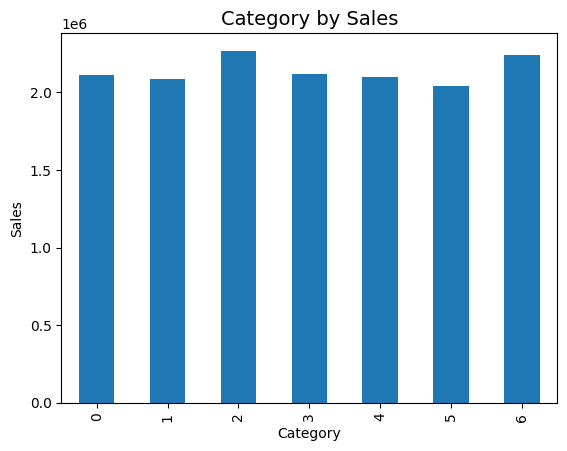

In [91]:
##create a plot of sales by category
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
bins
plt.ylabel('Sales')
plt.show()

In [92]:
#Extract month from the order date
data['month_no'] = data['Order Date'].dt.month
data['Month'] = pd.to_datetime(data['Order Date']).dt.strftime('%B')
data['year'] = data['Order Date'].dt.year


In [93]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year,month_no,Month,year
0,OD3324,Jackson,0,2,16,2015-01-03,0,864,0.26,380.16,0,3,1,2015,1,January,2015
1,OD740,Haseena,0,3,10,2015-01-04,0,2033,0.15,325.28,0,4,1,2015,1,January,2015
2,OD741,Vinne,1,13,20,2015-01-04,0,698,0.32,223.36,0,4,1,2015,1,January,2015
3,OD742,Sudha,6,5,4,2015-01-04,0,759,0.27,174.57,0,4,1,2015,1,January,2015
4,OD3873,Verma,2,10,19,2015-01-05,1,878,0.35,149.26,0,5,1,2015,1,January,2015


In [95]:
##Sum up sales by month
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
## Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')

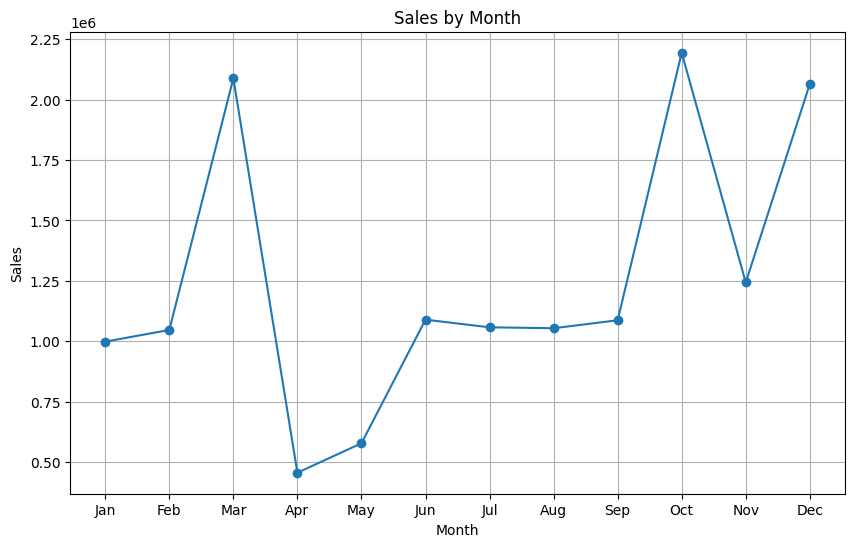

In [96]:
## Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'],
monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

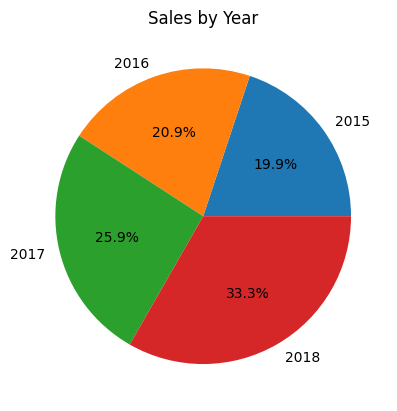

In [98]:
###find the Yearly Sales
Yearly_Sales=data.groupby("year")["Sales"].sum()
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,
autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()
#Monthly_Sales.plot(kind='pie')
#plt.title('Yearly Sales', fontsize = 14)
#plt.show()


In [102]:
### Extract citywise sales
city_sales = data[['City', 'Sales']]
## Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
## Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',
ascending=False)
## Select the top 5 cities
top_cities = sorted_cities.head(5)

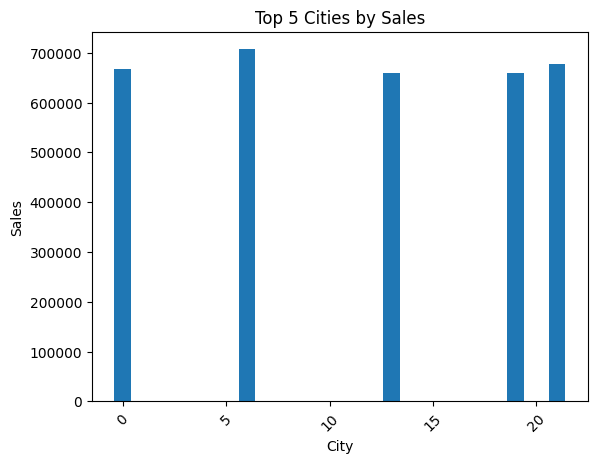

In [103]:
##Plot the bar chart with City
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()

### **Observation and coclustion for this Supermart Grocery Sales Prodiction**
1)**9994 rows and 13 columns have for given data sales.**
2)**nonull values identified and columns have am taken category, sales ,orderdate and top cites will taken**.
# 3)**mean squared Error:204152.78 and R-squared:0.35 came.**
4) **Monthly wise sales graph shows april and may months will have low sales and march ,october and december have high sales means above 2lakhs**.
5)**Yearly wise pie chart shows yealy wise sales is increase 19% from 2015 to
33.30% from 2018**.
6)**Top 5 cities sales have above 6 lakhs**.
7) **Catogory wise also sales have 2lakhs shows**.
# 8) **Finally am observe this senario this sales is increase 35%**.